In [1]:
import seaborn as sb
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

# We get the splitted data directly from keras datasets
# So, no need to use train_test_split()
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# print(X_train[:5][0])

print("Train:", X_train.shape, y_train.shape)
print("Test: ", X_test.shape, y_test.shape)

Train: (60000, 28, 28) (60000,)
Test:  (10000, 28, 28) (10000,)


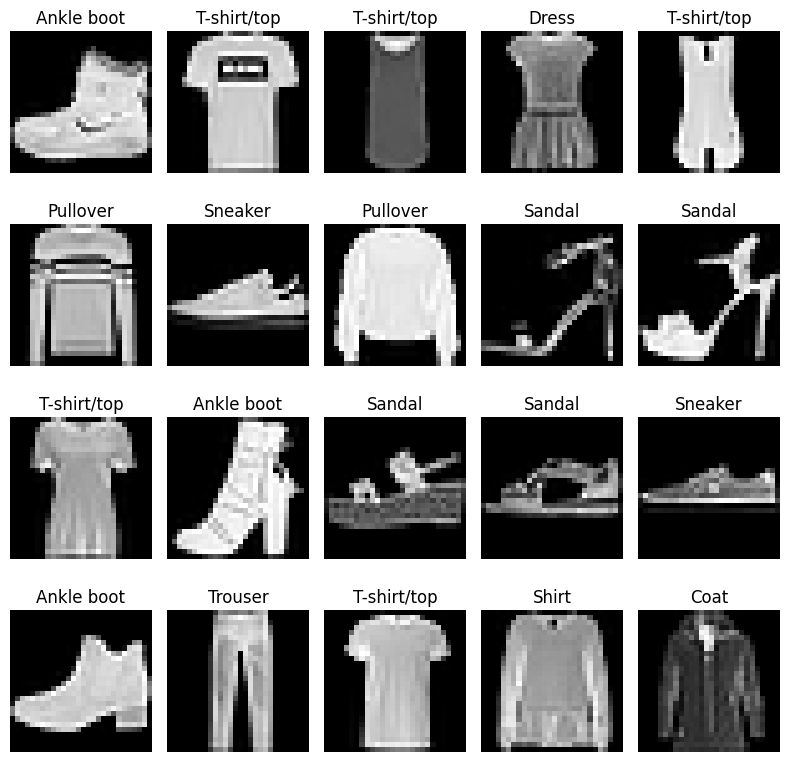

In [2]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Visualize sample images from the dataset
plt.figure(figsize=(8, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [3]:
# Scaling the data in [0, 1] range
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

# Reshaping the data to 2D arrays
X_train = X_train.reshape(len(X_train), -1) # 60000 x (28*28)
X_test = X_test.reshape(len(X_test), -1) # 10000 x (28*28)

In [4]:
# Use this for faster training
# X_train = X_train[:20000]
# y_train = y_train[:20000]

model = LogisticRegression(max_iter=1000, n_jobs=-1)
model.fit(X_train, y_train)

joblib.dump(model, "./models/logistic_regression_model.joblib")

['./models/logistic_regression_model.joblib']

Test Accuracy: 84.40%
Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.80      0.80      0.80      1000
     Trouser       0.97      0.96      0.96      1000
    Pullover       0.73      0.74      0.73      1000
       Dress       0.83      0.86      0.84      1000
        Coat       0.74      0.77      0.75      1000
      Sandal       0.94      0.92      0.93      1000
       Shirt       0.62      0.57      0.60      1000
     Sneaker       0.91      0.94      0.92      1000
         Bag       0.93      0.94      0.93      1000
  Ankle boot       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000

Confusion Matrix:


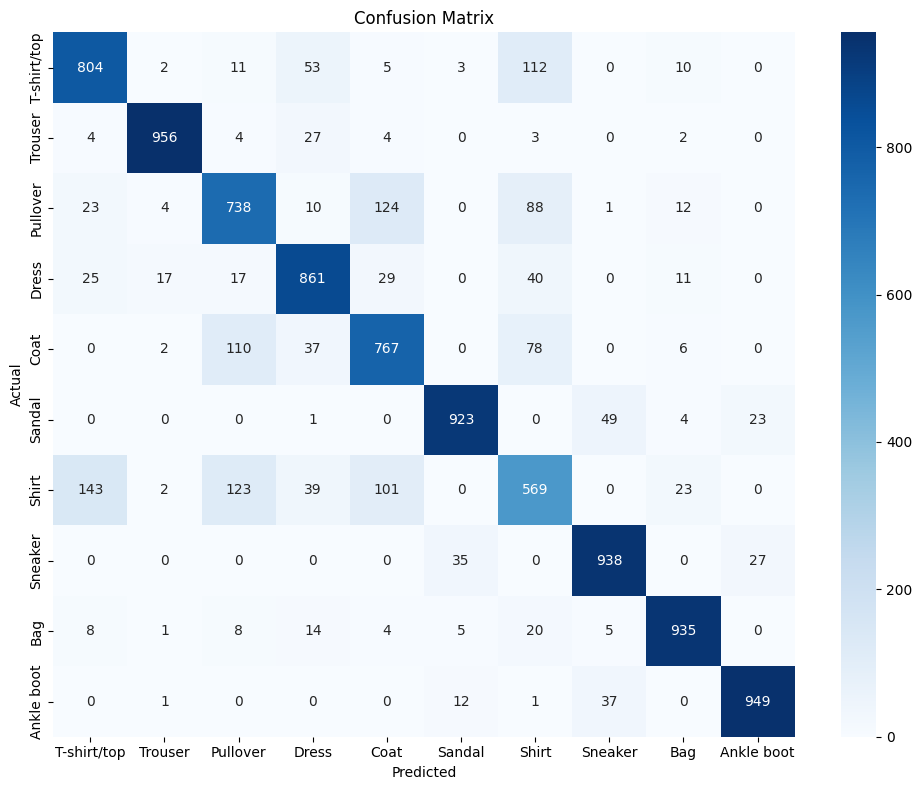

In [5]:
# To load the saved model
# model = joblib.load("./models/logistic_regression_model.joblib")

y_pred = model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

print("Confusion Matrix:")
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sb.heatmap(cm, annot=True, fmt="d", cmap="Blues",
           xticklabels=class_names,
           yticklabels=class_names)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

Logistic Regression achieved 84.40% accuracy, which is reasonable since it is a purely linear model. Clothing silhouettes and textures require non-linear feature extraction, which Logistic Regression cannot capture. This serves as a good baseline model.